## We Rate Dogs Twitter Feed Analysis

### 1. Intro: 

This project is all about gathering, assessing, cleaning, storing, analyzing and then visualizing the tweet history of the famous twitter account WeRatesDogs.

In [760]:
# At first, we start the project by installing all requested library.
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings

### 2. Gathering Data

In [761]:
#Getting data from an existing file and store as a dataframe named twitter_archieve
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [762]:
#Using the Requests library to download a file from the internet, then write it down as image_predictions.tsv file
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [763]:
# Read this newly created tsv file 
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [764]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [765]:
# Personal API keys, secrets and tokens have been replaced with place holders
# consumer_key ='My Key Goes Here'
# consumer_secret = 'My Key Goes Here'
# access_token = 'My Key Goes Here'
# access_secret = 'My Key Goes Here'

In [766]:
# Variables created for tweepy query
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify= True)

In [767]:
# use For loop to add each tweet to a new line of a text file, write them all as a file named tweet_json.txt. 
with open('tweet_json.txt', 'a', encoding = 'utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [768]:
# use For loop to collect tweets into a list
tweets_data = []
tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try: 
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [769]:
# create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [770]:
# Add some variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['farvorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

### 3. Accessing

We are going to access the twitter_archive, image_predictions and tweet_info DataFrame in term of their head(), tail(), info() and descriptive statistic categories. From that we will see a big picture of what these data set are like, what are they lacking and incorrect.

In [771]:
# first 15 rows of twitter_archive DataFrame
twitter_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [772]:
# last 15 rows of twitter_archive DataFrame
twitter_archive.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000022159362/photo/1,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.co

In [773]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [774]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [775]:
# first 15 rows of image_predictions DataFrame
image_predictions.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [776]:
# last 15 rows of image_predictions DataFrame
image_predictions.tail(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [777]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [778]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [779]:
# Rename the id columns to "tweet_id" in order to match with another Dataframe, then view first 5 rows of tweet_info DataFrame
tweet_info.rename(index=str, columns={"id":"tweet_id"}, inplace=True)
tweet_info.head(5)

,tweet_id,retweet_count,farvorite_count
0,892420643555336193,8328,38075
1,892177421306343426,6151,32683
2,891815181378084864,4072,24595
3,891689557279858688,8472,41435
4,891327558926688256,9166,39610


In [780]:
tweet_info.describe()

,tweet_id,retweet_count,farvorite_count
count,1.783000e+03,1783.000000,1783.000000
mean,7.644104e+17,3596.747056,9872.496915
std,6.367276e+16,5366.963916,13331.072948
min,6.772289e+17,0.000000,0.000000
25%,7.039145e+17,1000.000000,2594.000000
50%,7.580996e+17,1994.000000,5111.000000
75%,8.182835e+17,4140.000000,12548.000000
max,8.924206e+17,83770.000000,164485.000000


## 4. Issue Gathered

### Quality Issue:

#### * twitter_archive dataset

Issue #1: Inappropriate columns type. There are some including:tweet_id, source,  timestamp... columns should be corrected to its type.

Issue #2: Most of the rating should use 10 as a denominator. We should correct the one that doesn't.

Issue #3: 'name' columns have many cells which are None, missing or incorrect value.

Issue #4: The only data we want should have original (no retweets) ratings and have images as well.

Issue #5: In the 'text' column, there are a few extra characters after '&'

Issue #6: Some collumns should be renamed to be more details and easy to read. For example: timestamp, source, text...

Issue #7: The 'source' column is diffcult to read as It contains <html> tags and links

#### *  image_predictions and tweet_info dataset

Issue #8: Duplicated tweet_id cell noticed.

### Tidiness

Issue #9: We can demostrate Dog "stage" information by collecting from four columns: doggo, floofer, pupper, puppo.

Issue #10: We can join image_predictions and tweet_info to twitter_archive table for easy read and collecting information.

## 5. Cleaning

In this step, we will start fixing our Quality and Tidiness issues which is stated in the last step. 
At first, we have to create copies of Original DataFrames. It is better to be safe here.

In [781]:
twitter_archive_backup = twitter_archive.copy()
image_predictions_backup = image_predictions.copy()
tweet_info_backup = tweet_info.copy()

#### Define
By joining all DataFrame at one, it is easier to us to manage and solve all of the issues

#### Code

In [782]:
df_all = pd.merge(twitter_archive, image_predictions, how = 'left', on=['tweet_id'])
df_all = pd.merge(df_all, tweet_info, how ='left', on=['tweet_id'])
df_all.to_csv('df_all.csv', encoding='utf-8')
#This will solve Issue #10 stated above

#### Test

In [783]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

#### Define
By following order, we delete the retweets, duplicated tweet_id and tweets with no image

#### Code

In [784]:
df_all = df_all[pd.isnull(df_all.retweeted_status_id)]
df_all = df_all.drop_duplicates()
df_all = df_all.dropna(subset=['jpg_url'])
#This will solve Issue #8 stated above

In [785]:
# Now remove abundance columns we don't need any more
df_all = df_all.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'])
# Issue #4 is solved

#### Test

In [786]:
list(df_all)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'farvorite_count']

#### Define
Blending 4 different dog stages ('doggo', 'floofer', 'pupper', 'puppo') into one column helps us to easily access and manage the content.

#### Code

We are extracting dog stages variable from the 'text' columns. Some dogs may have more than one stage, however, I don't think it is an issue. I think that the dogs just get an additional stage when they get older. So, we can take the first stage that listed in the column. 

In [787]:
df_all['dog_stages'] = df_all['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [788]:
selected_columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_all = df_all.drop(selected_columns, axis=1)
#Solved Issue #9

#### Test

In [789]:
df_all.dog_stages.value_counts()

pupper     223
doggo      72 
puppo      28 
floofer    3  
Name: dog_stages, dtype: int64

#### Define
Most of the rating should use 10 as a denominator. We should correct the one that doesn't.

#### Code

In [790]:
# Take a look at the denominators where they are incorrected.
incorrect_denominator = twitter_archive[
    twitter_archive.rating_denominator != 10]
incorrect_denominator = incorrect_denominator[['tweet_id', 'text', 
    'rating_numerator', 'rating_denominator']]
incorrect_denominator.sample(5)

,tweet_id,text,rating_numerator,rating_denominator
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20


In [791]:
# We count how many denominator are incorrected.
len(incorrect_denominator)

23

In [792]:
# Change the value to its correct number.
df_all.replace(df_all['rating_denominator'], 10, inplace = True)

#### Test

In [793]:
twitter_archive.rating_denominator.value_counts().head(10)
# Fixed Issue 2

10    2333
11    3   
50    3   
80    2   
20    2   
2     1   
16    1   
40    1   
70    1   
15    1   
Name: rating_denominator, dtype: int64

#### Define
After researching the 'text' column, I noticed the pattern:
         This is [name] ..
         Meet [name] ..
         Say hello to [name] ..
         Here we have [name] ..
         .. named [name] ..

#### Code

In [794]:
#By looping through all the text, we can easily extract the dog's name from the tweet

dog_names = []

for text in df_all['text']:
    # Sentences starts with 'This is ' and the fisrt letter of the name is uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    # Sentences start with 'Meet ' and the fisrt letter of the name is uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    # Sentences start with 'Say hello to ' and the fisrt letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Sentences start with 'Here we have ' and the fisrt letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Sentences contain 'named' and the fisrt letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # Otherwise..
    else:
        dog_names.append('NaN')

# Save the result in a column 'dog_name' and append to the table
df_all['dog_names'] = dog_names

In [795]:
df_all['dog_names']

0       Phineas 
1       Tilly   
2       Archie  
3       Darla   
4       Franklin
5       NaN     
6       Jax     
7       NaN     
8       Zoey    
9       Cassie  
10      Koda    
11      Bruno   
12      NaN     
13      Ted     
14      Stuart  
15      Oliver  
16      Jim     
17      Zeke    
18      Ralphus 
20      Gerald  
21      Jeffrey 
22      NaN     
23      Canela  
24      NaN     
25      NaN     
26      Maya    
27      Mingus  
28      Derek   
29      Roscoe  
31      Waffles 
         ...    
2326    NaN     
2327    NaN     
2328    NaN     
2329    NaN     
2330    NaN     
2331    NaN     
2332    NaN     
2333    NaN     
2334    NaN     
2335    NaN     
2336    NaN     
2337    NaN     
2338    NaN     
2339    NaN     
2340    NaN     
2341    NaN     
2342    NaN     
2343    NaN     
2344    NaN     
2345    NaN     
2346    NaN     
2347    NaN     
2348    NaN     
2349    NaN     
2350    NaN     
2351    NaN     
2352    NaN     
2353    NaN   

In [796]:
#Now we can delete the 'name' column as we dont need it any more
df_all= df_all.drop(columns = 'name', axis =1)
#This will solve Issue #3 stated above

#### Test

In [797]:
df_all

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,farvorite_count,dog_stages,dog_names
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,bagel,0.085851,False,banana,0.076110,False,8328.0,38075.0,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,Pekinese,0.090647,True,papillon,0.068957,True,6151.0,32683.0,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,4072.0,24595.0,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8472.0,41435.0,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9166.0,39610.0,NaN,Franklin
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3051.0,19891.0,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,2022.0,11622.0,NaN,Jax
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they tu

#### Define
We can convert each column to its appropriate type by the following commands.

#### Code

In [798]:
df_all['tweet_id'] = df_all['tweet_id'].astype(object)
df_all['timestamp'] = pd.to_datetime(df_all.timestamp)
df_all['source'] = df_all['source'].astype('category')
df_all['dog_stages'] = df_all['dog_stages'].astype('category')
df_all['rating_numerator'] = df_all['rating_numerator'].astype(float)
df_all['rating_denominator'] = df_all['rating_denominator'].astype(float)
# Issue #1 solved

#### Test

In [799]:
df_all.dtypes

tweet_id              object        
timestamp             datetime64[ns]
source                category      
text                  object        
expanded_urls         object        
rating_numerator      float64       
rating_denominator    float64       
jpg_url               object        
img_num               float64       
p1                    object        
p1_conf               float64       
p1_dog                object        
p2                    object        
p2_conf               float64       
p2_dog                object        
p3                    object        
p3_conf               float64       
p3_dog                object        
retweet_count         float64       
farvorite_count       float64       
dog_stages            category      
dog_names             object        
dtype: object

#### Define
To make 'source' column easier to read, we need to remove the embedded url

#### Code

In [800]:
df_all['source'] = df_all['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_all['source'] = df_all['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_all['source'] = df_all['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_all['source'] = df_all['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')
#This will solve Issue #7 stated above

#### Test

In [801]:
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,farvorite_count,dog_stages,dog_names
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,bagel,0.085851,False,banana,0.076110,False,8328.0,38075.0,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,Pekinese,0.090647,True,papillon,0.068957,True,6151.0,32683.0,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,4072.0,24595.0,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8472.0,41435.0,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9166.0,39610.0,NaN,Franklin


#### Define
We can rename the columns to make them more more specific and detailed

#### Code

In [802]:
df_all = df_all.rename(columns = {'timestamp': 'tweet_date', 'source': 'tweet_source', 'text': 'tweet_content', 'expanded_urls': 'tweet_url', 'jpg_url': 'tweet_picture_predicted'})
#This will solve Issue #6 stated above

#### Test

In [803]:
df_all.head()

,tweet_id,tweet_date,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,tweet_picture_predicted,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,farvorite_count,dog_stages,dog_names
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,bagel,0.085851,False,banana,0.076110,False,8328.0,38075.0,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,Pekinese,0.090647,True,papillon,0.068957,True,6151.0,32683.0,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,4072.0,24595.0,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8472.0,41435.0,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9166.0,39610.0,NaN,Franklin


#### Define
In this section, we are removing extra characters in the 'tweet_content' column 

#### Code

In [804]:
# View rows which contain '&amp;' instead of '&' in 'tweet_content' column
df_all[df_all.tweet_content.str.contains('&amp;')]

,tweet_id,tweet_date,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,tweet_picture_predicted,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,farvorite_count,dog_stages,dog_names
262,842765311967449089,2017-03-17 15:51:22,Twitter for iPhone,Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12.0,10.0,https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg,1.0,tub,...,bucket,0.105166,False,Labrador_retriever,0.029340,True,1357.0,7042.0,NaN,Indie
320,834458053273591808,2017-02-22 17:41:18,Twitter for iPhone,"Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",https://twitter.com/dog_rates/status/834458053273591808/photo/1,12.0,10.0,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,1.0,Rhodesian_ridgeback,...,whippet,0.177531,True,redbone,0.106552,True,1810.0,10117.0,NaN,Chester
461,817536400337801217,2017-01-07 01:00:41,Twitter for iPhone,"Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu","https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12.0,10.0,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2.0,pug,...,French_bulldog,0.028518,True,Boston_bull,0.000086,True,3319.0,12586.0,NaN,Eugene
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden_retriever,...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1571.0,5699.0,NaN,Sam
799,772826264096874500,2016-09-05 15:58:34,Twitter for iPhone,Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11.0,10.0,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,1.0,basset,...,Walker_hound,0.072416,True,beagle,0.008229,True,2535.0,8497.0,NaN,Roosevelt
889,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10.0,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,golden_retriever,...,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,2053.0,6310.0,doggo,Maggie
898,758854675097526272,2016-07-29 02:40:28,Twitter for iPhone,"This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW","https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1",11.0,10.0,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4.0,barrow,...,Old_English_sheepdog,0.023791,True,komondor,0.001246,True,968.0,3760.0,NaN,Lilli
976,750026558547456000,2016-07-04 18:00:41,TweetDeck,Meet Jax &amp; Jil. Jil is yelling the pledge o

In [805]:
df_all.tweet_content.replace("&amp;","&")
# Fixed Issue #5

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

#### Test

In [806]:
df_all.head(5)

,tweet_id,tweet_date,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,tweet_picture_predicted,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,farvorite_count,dog_stages,dog_names
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,bagel,0.085851,False,banana,0.076110,False,8328.0,38075.0,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,Pekinese,0.090647,True,papillon,0.068957,True,6151.0,32683.0,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,4072.0,24595.0,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8472.0,41435.0,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9166.0,39610.0,NaN,Franklin


In [807]:
# Store the clean DataFrame in a CSV file
df_all.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## 6. Analyzing and visualizing data

In [808]:
df_all = pd.read_csv('twitter_archive_master.csv')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_content              1994 non-null object
tweet_url                  1994 non-null object
rating_numerator           1994 non-null float64
rating_denominator         1994 non-null float64
tweet_picture_predicted    1994 non-null object
img_num                    1994 non-null float64
p1                         1994 non-null object
p1_conf                    1994 non-null float64
p1_dog                     1994 non-null bool
p2                         1994 non-null object
p2_conf                    1994 non-null float64
p2_dog                     1994 non-null bool
p3                         1994 non-null object
p3_conf                    1994 non-null float64
p3_dog                     1994 non-null bool
retweet_count              145

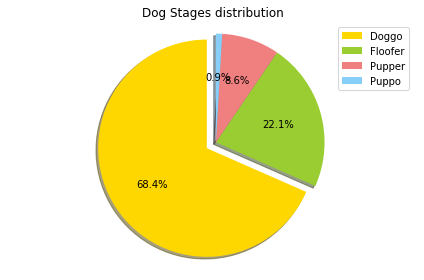

In [809]:
# Creating the dog_stages pie chart
labels = ['Doggo', 'Floofer', 'Pupper', 'Puppo']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Doggo')
plt.pie(df_all['dog_stages'].value_counts(),explode = explode, autopct='%1.1f%%', colors = colors, shadow=True,startangle=90)
plt.title('Dog Stages distribution')
plt.legend(labels)
plt.tight_layout()

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

One can not deny that 'doggo' is the most popular dog stage among the survey. It  accounted for nearly 70% of all stage which is two times higher that of the rest's combination.

Text(0,0.5,'Rating_ratio')

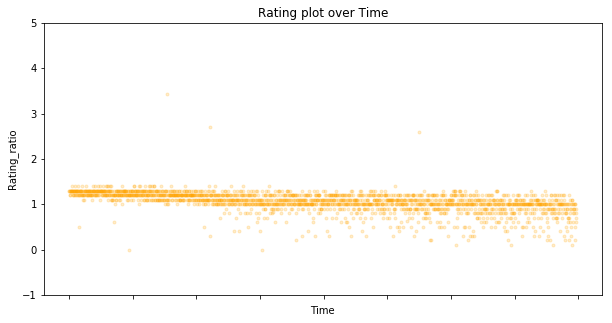

In [810]:
#Set timestamp as an index
df_all.set_index('tweet_date', inplace = True)
#calculation the rationg_ratio then plot it
df_all['rating_ratio'] = df_all['rating_numerator']/df_all['rating_denominator']
df_all['rating_ratio'].plot(figsize=(10, 5),style = '.', alpha = .2, color = 'orange')
plt.title('Rating Ratio over Time')
plt.xlabel('Time')
plt.ylabel('Rating_ratio')
#Set our range of rating ratio to easier read
plt.ylim(-1,5)

In [814]:
df_all[df_all['rating_ratio'] >=1]['rating_ratio'].describe()

count    1579.000000
mean     1.286972   
std      4.562160   
min      1.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: rating_ratio, dtype: float64

More than 75% of the data has more than 12/10 as rating
More than 50% of the data has more than 11/10 as rating
Rating is trending down over time. More ever, the rating range seems more diversity than that of the past

Text(0.5,1,'Scatter Plot of Favorites and Retweets count')

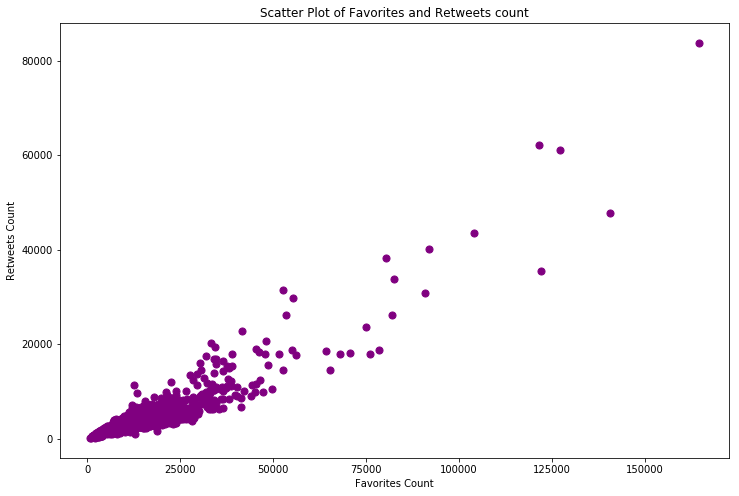

In [812]:
# Scatter plot of favorites and retweets count.
df_all.plot(kind = 'scatter', x = 'farvorite_count', y = 'retweet_count', s=50, figsize=(12,8), color = 'purple')
plt.xlabel('Favorites Count')
plt.ylabel('Retweets Count')
plt.title('Scatter Plot of Favorites and Retweets count')

Not supprisingly, a correlation map illustrates that if the number of the retweet is high then the number of farvorite will be high as well.

Text(0.5,1,'Horizontal Bar plot of Tweet Sources')

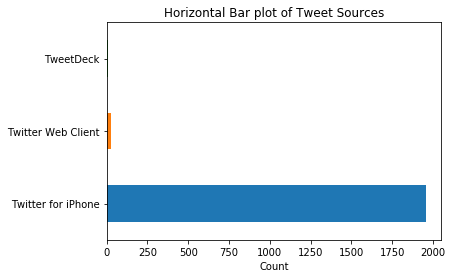

In [813]:
df_all['tweet_source'].value_counts().plot(kind = 'barh')
plt.xlabel('Count')
plt.title('Horizontal Bar plot of Tweet Sources')

The number of tweets submitted from Iphone is ridiculously higher than that of all other source, indicating that people are tent to tweet by their Iphone instead of other means when using Twitter.

## Conclusion:

The Twitter account WeRateDog is a good source to collect information regarding user's beloved dogs' stages, rating, favorite and retweets counted over time. However, we need to put effort in cleaning data retrive from Twitter API as the raw data is having a lot of problems making it difficult to read and research.
If you want a specific row of data to analyze, my adivise is to validate its own and related columns data before using them for visualization